# Figure S1h-j

In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

import replay_structure.structure_models as models
import replay_structure.metadata as meta 
import replay_structure.read_write as read_write

import importlib

In [8]:
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 7

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [9]:
data_types_list = [meta.Ripple_Data, 
                   meta.PlaceFieldID_Shuffle_Data, 
                   meta.PlaceField_Rotation_Data,
                  ]
time_window_ms = 3
ripple_mc_results = dict()
mc_results = dict()
random_effects_results = dict()
max_ll_results = dict()
deviance_explained = dict()

for data_type in data_types_list:
    mc_results[str(data_type.name)] = dict()
    random_effects_results[str(data_type.name)] = np.zeros((meta.N_SESSIONS, meta.N_MODELS))
    ripple_mc_results[str(data_type.name)] = dict()
    max_ll_results[str(data_type.name)] = np.zeros((meta.N_SESSIONS, meta.N_MODELS))
    deviance_explained[str(data_type.name)] = dict()
    for i, session in enumerate(meta.Session_List):
        mc_results[str(data_type.name)][str(session)] = read_write.load_model_comparison_results(session, time_window_ms, data_type.name, data_type.default_likelihood_function, ext='')
        ripple_mc_results[str(data_type.name)][str(session)] = read_write.load_model_comparison_results(session, time_window_ms, data_type.name, data_type.default_likelihood_function, ext='')
        random_effects_results[str(data_type.name)][i] = ripple_mc_results[str(data_type.name)][str(session)].random_effects_results["p_models"]
        max_ll = ripple_mc_results[str(data_type.name)][str(session)].results_dataframe["mll_model"].value_counts()
        for model in meta.MODELS_AS_STR:
            if model not in max_ll:
                max_ll[model] = 0
        max_ll_results[str(data_type.name)][i] = max_ll[meta.MODELS_AS_STR]/np.sum(max_ll)
        deviance_explained[str(data_type.name)][str(session)] = read_write.load_deviance_explained_results(
            session, data_type.default_time_window_ms, data_type.name, data_type.default_likelihood_function, ext='')

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day1_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day1_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day1_4cm_3ms_poisson_deviance_explained.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day2_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day2_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day2_4cm_3ms_poisson_deviance_explained.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat2day1_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/ra

In [11]:
all_deviance_explained = dict()
deviance_explained_x_best_fit = dict()
deviance_explained_x_random = dict()
deviance_explained_y = dict()

for data_type in data_types_list:
    all_deviance_explained[str(data_type.name)] = deviance_explained[str(data_type.name)]['rat1day1'].results
    for session in meta.Session_List[1:]:
        all_deviance_explained[str(data_type.name)] = all_deviance_explained[str(data_type.name)].append(deviance_explained[str(data_type.name)][str(session)].results)

    all_deviance_explained[str(data_type.name)] = all_deviance_explained[str(data_type.name)][~np.any(np.isnan(all_deviance_explained[str(data_type.name)]), axis=1)]
    total_SWRs_with_popburst = len(all_deviance_explained[str(data_type.name)])

    deviance_explained_x_best_fit[str(data_type.name)] = np.sort(all_deviance_explained[str(data_type.name)].max(axis=1))
    deviance_explained_x_random[str(data_type.name)] = np.sort(all_deviance_explained[str(data_type.name)]['random'])
    deviance_explained_y[str(data_type.name)] = np.arange(total_SWRs_with_popburst)/total_SWRs_with_popburst

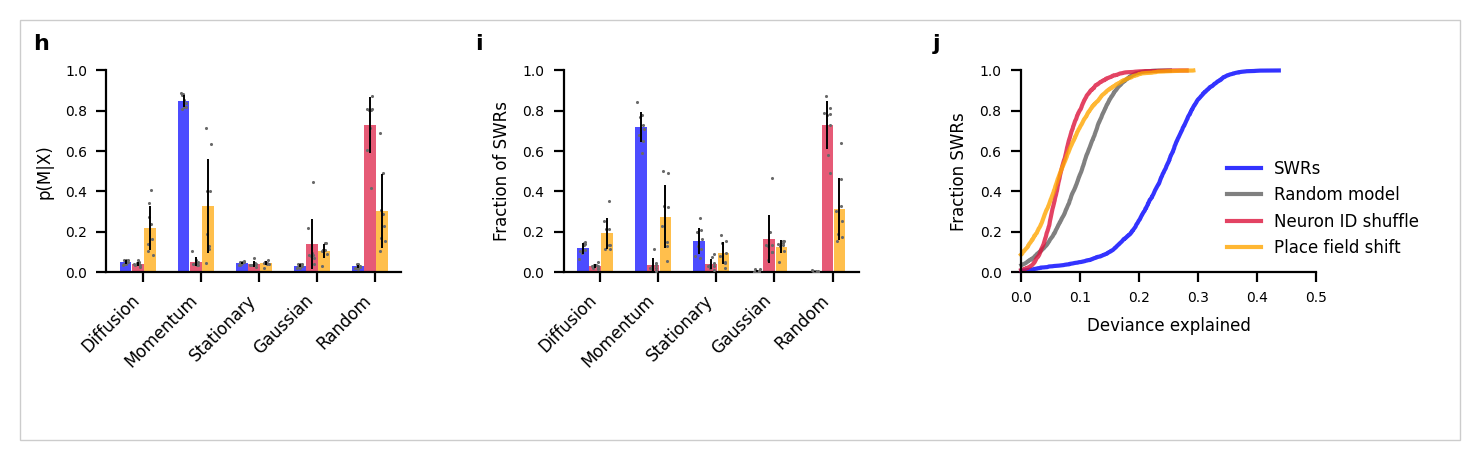

In [12]:
figure_width = 7.2
figure_height = 2.1
fig, ax = plt.subplots(1,3,figsize=(figure_width,figure_height), dpi=200)
plt.subplots_adjust(left=.06, wspace=.55, right = .9, bottom=.4)
footer = .25
margin = .1

data_type_plot = {'ripples': 'SWRs', 'placefield_rotation': 'Place field shift', 'placefieldID_shuffle': 'Neuron ID shuffle'}

colors = ["blue", "crimson", 'orange']
model_names_dict = {'diffusion': 'Diffusion', 
               'momentum': 'Momentum', 
               'stationary': 'Stationary', 
               'stationary_gaussian': 'Gaussian', 
               'random': 'Random'}
model_names = [model_names_dict[model] for model in meta.MODELS_AS_STR]

j = 0
for i, data_type in enumerate(data_types_list):
#     i = 0
    p_models_mean = np.mean(random_effects_results[str(data_type.name)], axis=0)
    p_models_sd = np.std(random_effects_results[str(data_type.name)], axis=0)
    ax[j].bar(np.arange(meta.N_MODELS)+.21*i, p_models_mean, yerr=p_models_sd,
            width=.2, label=data_type_plot[str(data_type.name)], color=colors[i], alpha=.7, error_kw=dict(lw=.7, zorder=101))
    for s in range(meta.N_SESSIONS):
        ax[j].scatter(np.arange(meta.N_MODELS)+.21*i+(np.random.rand()-.5)/8, random_effects_results[str(data_type.name)][s], s=5, color='dimgray', zorder=100, marker='.', linewidths=0)

    ax[j].set_ylabel("p(M|X)")

j = 1
for i, data_type in enumerate(data_types_list):
    p_models_mean = np.mean(max_ll_results[str(data_type.name)], axis=0)
    p_models_sd = np.std(max_ll_results[str(data_type.name)], axis=0)
    ax[j].bar(np.arange(meta.N_MODELS)+.21*i, p_models_mean, yerr=p_models_sd,
            width=.2, label=data_type_plot[str(data_type.name)], color=colors[i], alpha=.7, error_kw=dict(lw=.7, zorder=101))
    for s in range(meta.N_SESSIONS):
        ax[j].scatter(np.arange(meta.N_MODELS)+.21*i+(np.random.rand()-.5)/8, max_ll_results[str(data_type.name)][s], s=5, color='dimgray', zorder=100, marker='.', linewidths=0)

    ax[j].set_ylabel("Fraction of SWRs")
        
for j in range(2):
    ax[j].set_xticks(np.arange(meta.N_MODELS)+.3)
    ax[j].set_ylim([0,1])
    ax[j].set_xticklabels(model_names, rotation=45, ha='right', fontsize=6)
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)


    
j = 2
ax[j].spines["right"].set_visible(False)
ax[j].spines["top"].set_visible(False)
ax[j].tick_params(axis='both')
ax[j].set_ylabel("Fraction SWRs")
ax[j].set_xlabel("Deviance explained")
ax[j].set_ylim([0,1])
ax[j].set_xlim([0,.5])

for i, data_type in enumerate(data_types_list):
    ax[j].plot(deviance_explained_x_best_fit[str(data_type.name)][deviance_explained_x_best_fit[str(data_type.name)] >0], 
               deviance_explained_y[str(data_type.name)][deviance_explained_x_best_fit[str(data_type.name)] >0], 
               color=colors[i], alpha=.8, label=data_type_plot[str(data_type.name)], clip_on=False)
    if i == 0:
        ax[j].plot(deviance_explained_x_random[str(data_type.name)][deviance_explained_x_random[str(data_type.name)] >0], 
                   deviance_explained_y[str(data_type.name)][deviance_explained_x_random[str(data_type.name)] >0], 
                   color='gray', label='Random model', clip_on=False)
    ax[j].legend(frameon=False, loc=4, bbox_to_anchor=(1.4,0,0,0))

ax[0].text(-.25,1.1, 'h', size=8, transform=ax[0].transAxes, fontweight='bold')
ax[1].text(-.3,1.1, 'i', size=8, transform=ax[1].transAxes, fontweight='bold')
ax[2].text(-.3,1.1, 'j', size=8, transform=ax[2].transAxes, fontweight='bold')

plt.savefig(os.path.join(meta.FIGURES_PATH, "FigureS1h-j.svg"), dpi=500, transparent=True)


    
rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

In [13]:
print("p_exceedance (mean+/sd) across sessions")
print("---------------------------------------")
p_exceedance = dict()
for data_type in data_types_list:
    print(data_type.name)
    p_exceedance[str(data_type)] = np.zeros((meta.N_SESSIONS, meta.N_MODELS))
    for i, session in enumerate(meta.Session_List):
        p_exceedance[str(data_type)][i] = mc_results[str(data_type.name)][str(session)].random_effects_results["p_exceedance"].round(2)
    for j, model in enumerate(meta.MODELS_AS_STR):
        print(f"model {model}: {np.round(p_exceedance[str(data_type)].mean(axis=0)[j],2)} +/- {np.round(p_exceedance[str(data_type)].std(axis=0)[j],2)}")

p_exceedance (mean+/sd) across sessions
---------------------------------------
ripples
model diffusion: 0.0 +/- 0.0
model momentum: 1.0 +/- 0.0
model stationary: 0.0 +/- 0.0
model stationary_gaussian: 0.0 +/- 0.0
model random: 0.0 +/- 0.0
placefieldID_shuffle
model diffusion: 0.0 +/- 0.0
model momentum: 0.0 +/- 0.0
model stationary: 0.0 +/- 0.0
model stationary_gaussian: 0.07 +/- 0.2
model random: 0.93 +/- 0.2
placefield_rotation
model diffusion: 0.22 +/- 0.37
model momentum: 0.5 +/- 0.5
model stationary: 0.0 +/- 0.0
model stationary_gaussian: 0.0 +/- 0.0
model random: 0.29 +/- 0.42
